uploading the zip file contating the images of ripe, unripe and overripe bananas and then extracting it

In [ ]:
from zipfile import ZipFile
file_name = "/content/data.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


**Folder Structure:**
apple and grapes pictures are also added in order to increase the size and variety of dataset so as to lessen the overfitting
```
data/
    train/
        unripe/
            img1.jpg
            img2.jpg
            ...
        ripe/
            img1.jpg
            img2.jpg
            ...
        unripe/
            img1.jpg
            img2.jpg
            ...
        apple/
            img1.jpg
            img2.jpg
            ...
        grapes/
            img1.jpg
            img2.jpg
            ...
    validation/
        unripe/
            img1.jpg
            img2.jpg
            ...
        ripe/
            img1.jpg
            img2.jpg
            ...
        unripe/
            img1.jpg
            img2.jpg
            ...
        apple/
            img1.jpg
            img2.jpg
            ...
        grapes/
            img1.jpg
            img2.jpg
            ...
```

**Defining the directories**

In [ ]:
import os 

os.chdir(r"/content/data")
base_dir = os.getcwd()
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_unripe_dir = os.path.join(train_dir, 'unripe') # Directory with training unripe pictures
validation_unripe_dir = os.path.join(validation_dir, 'unripe') # Directory with validation unripe pictures

train_ripe_dir = os.path.join(train_dir, 'ripe') # Directory with training ripe pictures
validation_ripe_dir = os.path.join(validation_dir, 'ripe') # Directory with validation ripe pictures

train_overripe_dir = os.path.join(train_dir, 'overripe') # Directory with training overripe pictures
validation_overripe_dir = os.path.join(validation_dir, 'overripe') # Directory with validation overripe pictures

train_apple_dir = os.path.join(train_dir, 'apple') # Directory with training apple pictures
validation_apple_dir = os.path.join(validation_dir, 'apple') # Directory with validation apple pictures

train_grapes_dir = os.path.join(train_dir, 'grapes') # Directory with training grapes pictures
validation_grapes_dir = os.path.join(validation_dir, 'grapes') # Directory with validation grapes pictures

Importing **ImageDataGenerator** from the Keras library. Then we create a datagen object using ImageDataGenerator with some augmentation parameters in it.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest')

In 1st loop we change the dir to the one having pictures. the in the 2nd loop we first load the image then reshapes it and using **.flow** we apply our datagen object onto our image and saves the images as a jpeg file. we follow the same process for each image in the directory for 8 times in a row. 

In [ ]:
for new_dir in (train_unripe_dir, train_ripe_dir, train_overripe_dir, train_apple_dir, train_grapes_dir, 
                validation_unripe_dir, validation_ripe_dir,validation_overripe_dir, validation_apple_dir, validation_grapes_dir):
    os.chdir(new_dir)
    for path in os.listdir():
        img = load_img(f"{path}")
        x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
        x = x.reshape((1,) + x.shape)
        i = 0
        for batch in datagen.flow(x, batch_size=1,
                            save_to_dir=".", save_prefix='img', save_format='jpeg'):
            i += 1
            if i > 8:     # creates 8 image from 1 image 
                break  

Now, to see what the filenames look like in the unripe, ripe, overripe, apple, grapes train directories

In [ ]:
unripe_fnames = os.listdir(train_unripe_dir)
print(unripe_fnames[:8])

ripe_fnames = os.listdir(train_ripe_dir)
print(ripe_fnames[:8])

overripe_fnames = os.listdir(train_overripe_dir)
print(overripe_fnames[:8])

apple_fnames = os.listdir(train_apple_dir)
print(ripe_fnames[:8])

grapes_fnames = os.listdir(train_grapes_dir)
print(overripe_fnames[:8])

['img_0_5954.jpeg', 'img_0_9759.jpeg', 'img_0_9292.jpeg', 'img_0_4660.jpeg', 'img_0_6629.jpeg', 'img_0_3023.jpeg', 'img_0_1280.jpeg', 'img_0_4171.jpeg']
['img_0_1140.jpeg', 'img_0_4812.jpeg', 'img_0_2941.jpeg', 'ripe (32).jpg', 'img_0_5353.jpeg', 'img_0_6308.jpeg', 'img_0_4685.jpeg', 'img_0_3330.jpeg']
['img_0_4678.jpeg', 'overripe (11).jpg', 'img_0_2183.jpeg', 'img_0_6230.jpeg', 'img_0_8015.jpeg', 'img_0_5179.jpeg', 'img_0_9916.jpeg', 'img_0_4577.jpeg']
['img_0_1140.jpeg', 'img_0_4812.jpeg', 'img_0_2941.jpeg', 'ripe (32).jpg', 'img_0_5353.jpeg', 'img_0_6308.jpeg', 'img_0_4685.jpeg', 'img_0_3330.jpeg']
['img_0_4678.jpeg', 'overripe (11).jpg', 'img_0_2183.jpeg', 'img_0_6230.jpeg', 'img_0_8015.jpeg', 'img_0_5179.jpeg', 'img_0_9916.jpeg', 'img_0_4577.jpeg']


Getting the total number of images in the directories:

In [ ]:
print('total training unripe images:', len(os.listdir(train_unripe_dir)))
print('total training ripe images:', len(os.listdir(train_ripe_dir)))
print('total training overripe images:', len(os.listdir(train_overripe_dir)))
print('total training apple images:', len(os.listdir(train_apple_dir)))
print('total training grapes images:', len(os.listdir(train_grapes_dir)))
print('total validation unripe images:', len(os.listdir(validation_unripe_dir)))
print('total validation ripe images:', len(os.listdir(validation_ripe_dir)))
print('total validation overripe images:', len(os.listdir(validation_overripe_dir)))
print('total validation apple images:', len(os.listdir(validation_apple_dir)))
print('total validation grapes images:', len(os.listdir(validation_grapes_dir)))

total training unripe images: 390
total training ripe images: 394
total training overripe images: 395
total training apple images: 395
total training grapes images: 397
total validation unripe images: 99
total validation ripe images: 100
total validation overripe images: 100
total validation apple images: 100
total validation grapes images: 100


Now taking a look at a few pictures to get a better sense of what the ripe, unripe, overripe, apple and grapes training datasets look like. 
First, configure the matplot parameters:

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 3x5 configuration
nrows = 5
ncols = 5

# Index for iterating over images
pic_index = 0

Now, display a batch of 5 unripe, ripe, overripe, apple, grapes training pictures. You can rerun the cell to see a fresh batch each time:

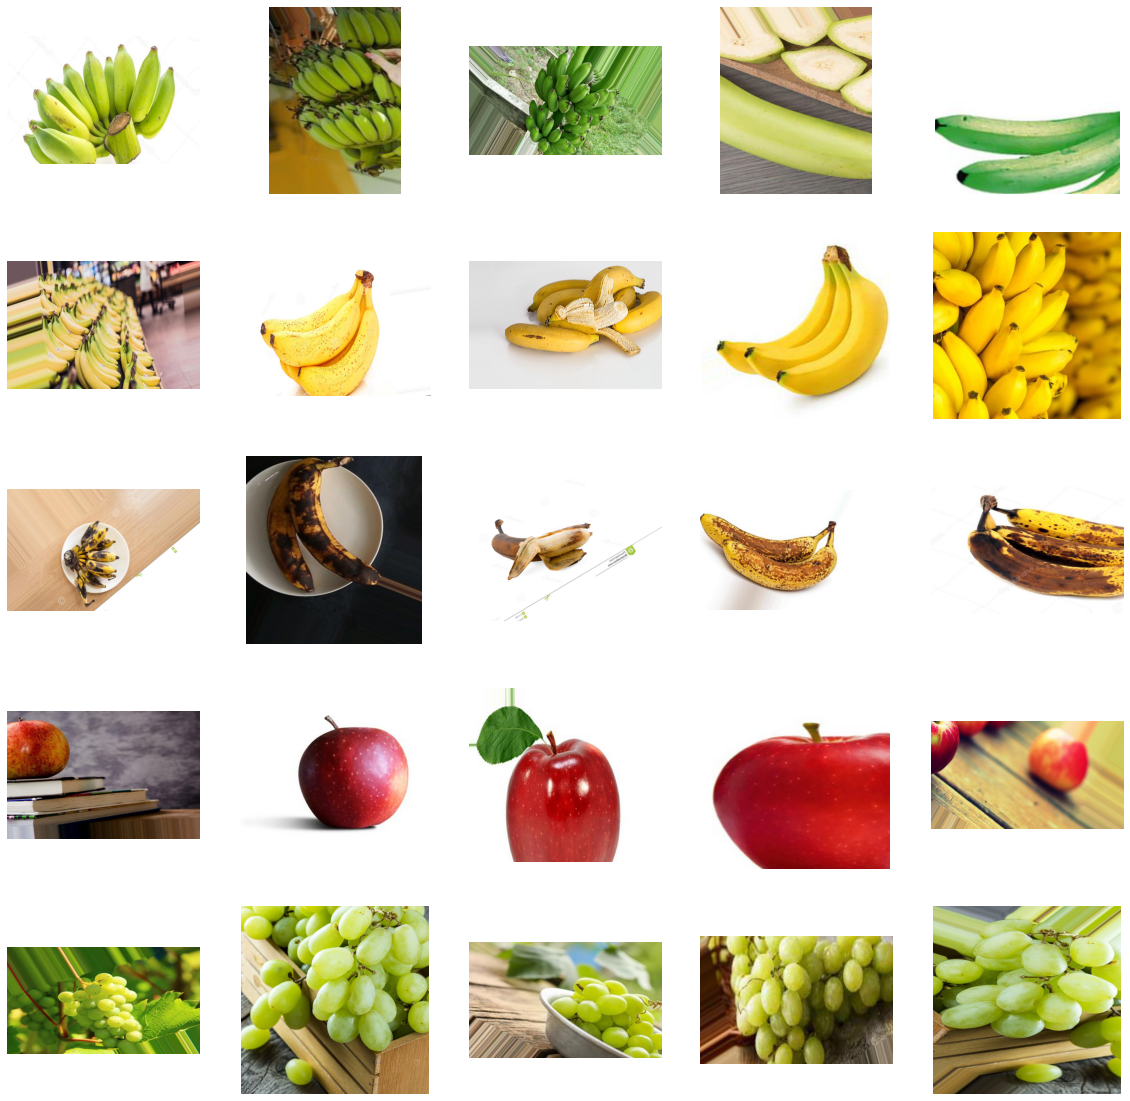

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 5
next_unripe_pix = [os.path.join(train_unripe_dir, fname) 
                for fname in unripe_fnames[pic_index-5:pic_index]]
next_ripe_pix = [os.path.join(train_ripe_dir, fname) 
                for fname in ripe_fnames[pic_index-5:pic_index]]
next_overripe_pix = [os.path.join(train_overripe_dir, fname) 
                for fname in overripe_fnames[pic_index-5:pic_index]]
next_apple_pix = [os.path.join(train_apple_dir, fname) 
                for fname in apple_fnames[pic_index-5:pic_index]]
next_grapes_pix = [os.path.join(train_grapes_dir, fname) 
                for fname in grapes_fnames[pic_index-5:pic_index]]

for i, img_path in enumerate(next_unripe_pix+next_ripe_pix+next_overripe_pix+next_apple_pix+next_grapes_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# **Model Building and Training**

### Using a pre-trained model
The process of training a convolutionnal neural network can be very time-consuming and require a lot of datas. So we are going to use the transfer learning technique to build our model. Transfer learning is a technique of taking a model that is trained on a larger dataset and applying its knowledge to train a much smaller dataset. In our case, we are going to use 3 different pre-trained models Vgg16, Vgg19 and ResNet50 and  convert it to classify between 5 categories.

First, we need to import all the necessary libraries related to model building and preprocessing images.

In [ ]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model 
from keras.applications.vgg16 import VGG16 
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np

Now the next step is to Load the pretrained model with its pretrained weights. The weights we are going to use are of imagenet and the Image size we are going to use is (224,224,3). we will also freeze all the layers and remove the last layer so that we can add our custom last layer with 3 nodes.

In [ ]:
# Defining Image size
IMAGE_SIZE = [224, 224]

### **Vgg16**

In [ ]:
# Loading Vgg16 model
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freezing layers
for layer in vgg16.layers:  
  layer.trainable = False

# adding a 5 node final layer for predicion
x = Flatten()(vgg16.output)
prediction1 = Dense(5, activation='softmax')(x)
model_1 = Model(inputs=vgg16.input, outputs=prediction1)

# Generating Summary
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
#Now we compile Vgg16
model_1.compile( loss='categorical_crossentropy',  
               optimizer='adam',  
               metrics=['accuracy'])

### **Vgg19**

In [ ]:
# Loading Vgg19 model
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freezing layers
for layer in vgg19.layers:  
  layer.trainable = False

# adding a 5 node final layer for predicion
y = Flatten()(vgg19.output)
prediction2 = Dense(5, activation='softmax')(y)
model_2 = Model(inputs=vgg19.input, outputs=prediction2)

# Generating Summary
model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
#Now we compile Vgg19
model_2.compile( loss='categorical_crossentropy',  
               optimizer='adam',  
               metrics=['accuracy'])

### **ResNet50**

In [ ]:
# Loading ResNet50 model
resnet50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freezing layers
for layer in resnet50.layers:  
  layer.trainable = False

# adding a 5 node final layer for predicion
z = Flatten()(resnet50.output)
prediction3 = Dense(5, activation='softmax')(z)
model_3 = Model(inputs=resnet50.input, outputs=prediction3)

# Generating Summary
model_3.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
#Now we compile ResNet50
model_3.compile( loss='categorical_crossentropy',  
               optimizer='adam',  
               metrics=['accuracy'])

### **Data Preprocessing**
Now we need to prepare the training set and the validation sets using the same ImageDataGenerator.

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, # all images will be rescaled by 1./255                      
                                    shear_range = 0.2,
                                   zoom_range = 0.2,
                                    horizontal_flip= True)
# Flow training images in batches of 16 using train_datagen generator
training_set = train_datagen.flow_from_directory(train_dir,
                                           target_size = (224, 224), #all images will be resized to 224x224
                                             batch_size = 16,                             
                                        class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)
# Flow validation images in batches of 16 using test_datagen generator
test_set = test_datagen.flow_from_directory(validation_dir,
                                         target_size = (224, 224),
                                         batch_size=16,
                                         class_mode = 'categorical')

Found 1971 images belonging to 5 classes.
Found 499 images belonging to 5 classes.


## **Training**

Here we'll pass train and test data to **fit_generator**. In fit_generator steps_per_epoch will set the batch size to pass training data to the model and validation_steps will do the same for test data. tweak it based on your system specifications.



In [ ]:
m_vgg16 = model_1.fit_generator(training_set, 
                        validation_data=test_set, 
                        epochs=10, 
                        steps_per_epoch=30, 
                        validation_steps=8)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
30/30 [==============================] - 12s 401ms/step - loss: 0.1445 - accuracy: 0.9542 - val_loss: 0.4826 - val_accuracy: 0.8516
Epoch 2/10
30/30 [==============================] - 11s 367ms/step - loss: 0.1362 - accuracy: 0.9500 - val_loss: 0.4416 - val_accuracy: 0.8594
Epoch 3/10
30/30 [==============================] - 11s 370ms/step - loss: 0.1037 - accuracy: 0.9729 - val_loss: 0.5721 - val_accuracy: 0.8438
Epoch 4/10
30/30 [==============================] - 11s 362ms/step - loss: 0.1075 - accuracy: 0.9667 - val_loss: 0.5132 - val_accuracy: 0.8359
Epoch 5/10
30/30 [==============================] - 11s 353ms/step - loss: 0.1054 - accuracy: 0.9688 - val_loss: 0.5703 - val_accuracy: 0.8672
Epoch 6/10
30/30 [==============================] - 11s 360ms/step - loss: 0.0965 - accuracy: 0.9657 - val_loss: 0.4330 - val_accuracy: 0.8984
Epoch 7/10
30/30 [==============================] - 12s 383ms/step - loss: 0.1261 - accuracy: 0.9625 - val_loss: 0.2847 - val_accuracy: 0.8672

In [ ]:
m_vgg19 = model_2.fit_generator(training_set, 
                        validation_data=test_set, 
                        epochs=10, 
                        steps_per_epoch=30, 
                        validation_steps=8)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
30/30 [==============================] - 12s 403ms/step - loss: 0.2266 - accuracy: 0.9186 - val_loss: 0.5000 - val_accuracy: 0.8672
Epoch 2/10
30/30 [==============================] - 12s 392ms/step - loss: 0.1839 - accuracy: 0.9229 - val_loss: 0.6773 - val_accuracy: 0.8047
Epoch 3/10
30/30 [==============================] - 11s 367ms/step - loss: 0.1237 - accuracy: 0.9521 - val_loss: 0.5490 - val_accuracy: 0.8672
Epoch 4/10
30/30 [==============================] - 11s 371ms/step - loss: 0.1041 - accuracy: 0.9625 - val_loss: 0.5812 - val_accuracy: 0.8047
Epoch 5/10
30/30 [==============================] - 12s 400ms/step - loss: 0.1243 - accuracy: 0.9604 - val_loss: 0.4068 - val_accuracy: 0.8828
Epoch 6/10
30/30 [==============================] - 11s 376ms/step - loss: 0.1098 - accuracy: 0.9667 - val_loss: 0.5683 - val_accuracy: 0.8438
Epoch 7/10
30/30 [==============================] - 12s 394ms/step - loss: 0.0876 - accuracy: 0.9708 - val_loss: 0.5518 - val_accuracy: 0.8594

In [ ]:
m_resnet50 = model_3.fit_generator(training_set, 
                        validation_data=test_set, 
                        epochs=10, 
                        steps_per_epoch=30, 
                        validation_steps=8)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
30/30 [==============================] - 11s 370ms/step - loss: 1.4067 - accuracy: 0.5354 - val_loss: 1.6490 - val_accuracy: 0.5703
Epoch 2/10
30/30 [==============================] - 11s 367ms/step - loss: 2.3878 - accuracy: 0.4604 - val_loss: 1.3112 - val_accuracy: 0.7188
Epoch 3/10
30/30 [==============================] - 11s 361ms/step - loss: 1.0794 - accuracy: 0.6188 - val_loss: 0.9315 - val_accuracy: 0.6875
Epoch 4/10
30/30 [==============================] - 11s 376ms/step - loss: 0.9143 - accuracy: 0.6646 - val_loss: 1.5999 - val_accuracy: 0.5625
Epoch 5/10
30/30 [==============================] - 11s 361ms/step - loss: 1.2002 - accuracy: 0.6042 - val_loss: 1.6102 - val_accuracy: 0.5078
Epoch 6/10
30/30 [==============================] - 11s 362ms/step - loss: 1.2660 - accuracy: 0.5979 - val_loss: 1.8649 - val_accuracy: 0.5156
Epoch 7/10
30/30 [==============================] - 11s 367ms/step - loss: 1.9287 - accuracy: 0.4797 - val_loss: 0.9790 - val_accuracy: 0.7188

## **Evaluating Accuracy and Loss of the Model**
plotting the training/validation accuracy and loss of different models as collected during training to compare it easily:

Text(0.5, 1.0, 'Training and Validation loss of ResNet50')

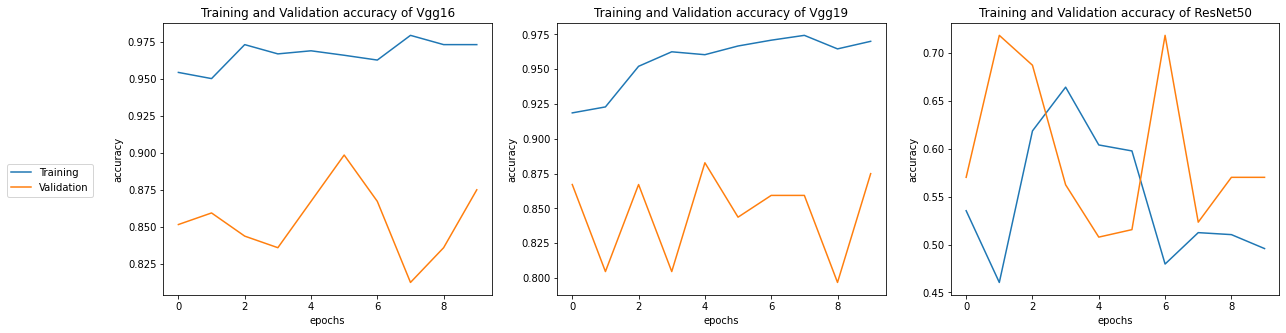

<Figure size 432x288 with 0 Axes>

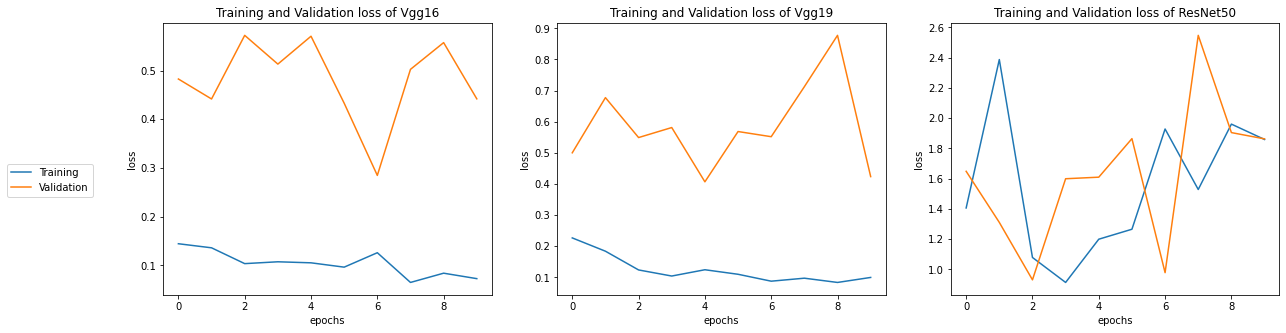

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc1 = m_vgg16.history['accuracy']
val_acc1 = m_vgg16.history['val_accuracy']

acc2 = m_vgg19.history['accuracy']
val_acc2 = m_vgg19.history['val_accuracy']

acc3 = m_resnet50.history['accuracy']
val_acc3 = m_resnet50.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss1 = m_vgg16.history['loss']
val_loss1 = m_vgg16.history['val_loss']

loss2 = m_vgg19.history['loss']
val_loss2 = m_vgg19.history['val_loss']

loss3 = m_resnet50.history['loss']
val_loss3 = m_resnet50.history['val_loss']

# Get number of epochs
epochs = range(len(acc1))

# Plot training and validation accuracy per epoch
plt.subplots(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.plot(epochs, acc1)
plt.plot(epochs, val_acc1)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Training','Validation'], bbox_to_anchor =(-0.20, 0.5))
plt.title('Training and Validation accuracy of Vgg16')

plt.subplot(1, 3, 2)
plt.plot(epochs, acc2)
plt.plot(epochs, val_acc2)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation accuracy of Vgg19')

plt.subplot(1, 3, 3)
plt.plot(epochs, acc3)
plt.plot(epochs, val_acc3)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation accuracy of ResNet50')

plt.figure()

# Plot training and validation loss per epoch
plt.subplots(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.plot(epochs, loss1)
plt.plot(epochs, val_loss1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Training','Validation'], bbox_to_anchor =(-0.20, 0.5))
plt.title('Training and Validation loss of Vgg16')

plt.subplot(1, 3, 2)
plt.plot(epochs, loss2)
plt.plot(epochs, val_loss2)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training and Validation loss of Vgg19')

plt.subplot(1, 3, 3)
plt.plot(epochs, loss3)
plt.plot(epochs, val_loss3)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training and Validation loss of ResNet50')

In [ ]:
test_loss1, test_acc1 = model_1.evaluate_generator(test_set, steps=10)
test_loss2, test_acc2 = model_2.evaluate_generator(test_set, steps=10)
test_loss3, test_acc3 = model_3.evaluate_generator(test_set, steps=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


final accuracy and loss of models after evaluating them.

In [ ]:
print('test acc of Vgg16: {0:.4f}'.format(test_acc1), '\ttest loss of Vgg16: {0:.4f}'.format(test_loss1))
print('test acc of Vgg19: {0:.4f}'.format(test_acc2), '\ttest loss of Vgg19: {0:.4f}'.format(test_loss2))
print('test acc of ResNet50: {0:.4f}'.format(test_acc3), '\ttest loss of ResNet50: {0:.4f}'.format(test_loss3))

test acc of Vgg16: 0.8938 	test loss of Vgg16: 0.4730
test acc of Vgg19: 0.8500 	test loss of Vgg19: 0.3985
test acc of ResNet50: 0.5938 	test loss of ResNet50: 1.8973
